In [ ]:
#pip install spacy

#spacy download en # english model
#spacy download de # german model
#spacy download es # spanish model
#spacy download fr # french model
#spacy download xx # multi-language model

# Basic life cycle

![01](img/02.png)

In [1]:
import spacy

nlp = spacy.load('pt')

# Preprocessing

In [2]:
from spacy.lang.pt.stop_words import STOP_WORDS

print(STOP_WORDS)

{'dá', 'daquele', 'caminho', 'tanto', 'baixo', 'vindo', 'dezassete', 'momento', 'após', 'possivelmente', 'veja', 'tive', 'estas', 'dois', 'terceira', 'muito', 'enquanto', 'essas', 'maioria', 'esse', 'além', 'cujo', 'este', 'catorze', 'somente', 'desse', 'alguns', 'fui', 'sobre', 'vinda', 'foste', 'toda', 'puderam', 'nosso', 'oitavo', 'são', 'nova', 'ainda', 'inicio', 'ambas', 'mês', 'somos', 'faço', 'todo', 'bem', 'nesse', 'sim', 'minhas', 'contra', 'porque', 'ora', 'números', 'poderá', 'tiveram', 'sistema', 'des', 'depois', 'tens', 'cinco', 'seis', 'neste', 'local', 'tivestes', 'oitava', 'todas', 'favor', 'posição', 'essa', 'querem', 'cada', 'tenho', 'nos', 'nove', 'por', 'doze', 'sexto', 'esses', 'te', 'meio', 'grande', 'esta', 'ponto', 'falta', 'todos', 'dezanove', 'eventual', 'mesmo', 'conhecido', 'novas', 'treze', 'questão', 'mas', 'pelas', 'embora', 'fora', 'pouca', 'vocês', 'ou', 'em', 'fará', 'lhe', 'nenhuma', 'de', 'aos', 'nossa', 'qual', 'menor', 'fez', 'sois', 'sob', 'fim', 

In [3]:
print('Quantidade de tokens em PT-BR: ', len(STOP_WORDS))

Quantidade de tokens em PT-BR:  413


In [4]:
my_stop_words = ['www', 'io', 'net', 'ai', 'org', 'edu']
for stopword in my_stop_words:
    STOP_WORDS.add(stopword)

print('Quantidade de tokens em PT-BR: ', len(STOP_WORDS))

Quantidade de tokens em PT-BR:  419


## Tokenizing

| 0 | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| Let | 's | go | to | N.Y. | ! |

In [5]:
doc = nlp('Então Angelo, você encontrou o livro que eu te falei no www.minhabiblioteca.net? Eu o encontrei ontem, até os estagiários encontraram, quer que eu te ajude?')
doc

Então Angelo, você encontrou o livro que eu te falei no www.minhabiblioteca.net? Eu o encontrei ontem, até os estagiários encontraram, quer que eu te ajude?

In [6]:
doc.text.split()

['Então',
 'Angelo,',
 'você',
 'encontrou',
 'o',
 'livro',
 'que',
 'eu',
 'te',
 'falei',
 'no',
 'www.minhabiblioteca.net?',
 'Eu',
 'o',
 'encontrei',
 'ontem,',
 'até',
 'os',
 'estagiários',
 'encontraram,',
 'quer',
 'que',
 'eu',
 'te',
 'ajude?']

![07](img/07.png)

In [7]:
[token for token in doc]

[Então,
 Angelo,
 ,,
 você,
 encontrou,
 o,
 livro,
 que,
 eu,
 te,
 falei,
 no,
 www.minhabiblioteca.net,
 ?,
 Eu,
 o,
 encontrei,
 ontem,
 ,,
 até,
 os,
 estagiários,
 encontraram,
 ,,
 quer,
 que,
 eu,
 te,
 ajude,
 ?]

In [8]:
sentence = []
for w in doc:
    #token = w.lower()
    # verifica se não é uma pontuação ou uma stopword
    if not w.is_stop and not w.is_punct and not w.like_num:
        sentence.append(w)
        #sentence.append(w.lemma_)
print(sentence)

[Então, Angelo, encontrou, o, livro, falei, www.minhabiblioteca.net, Eu, o, encontrei, estagiários, encontraram, ajude]


# Part-of-speech (POS) – tagging
### Análise de classes gramaticais

![05](img/05.png)

#### Hidden Markov model
* ref: https://en.wikipedia.org/wiki/Hidden_Markov_model

![04](img/04.png)

In [9]:
doc = nlp('Eu e o Angelo vamos ao parque.')

for token in doc:
    print((token.text, token.pos_))

('Eu', 'INTJ')
('e', 'CCONJ')
('o', 'DET')
('Angelo', 'PROPN')
('vamos', 'VERB')
('a', 'ADP')
('o', 'DET')
('parque', 'NOUN')
('.', 'PUNCT')


In [10]:
doc = nlp('Então Angelo, você encontrou o livro que eu te falei no www.minhabiblioteca.net? Eu o encontrei ontem, até os estagiários encontraram, quer que eu te ajude?')

[token for token in doc if token.pos_ == 'VERB']

[encontrou, falei, encontrei, encontraram, quer, ajude]

In [11]:
doc = nlp('encontrar encontrei fala falando')
tokens = [token for token in doc]

print('\nO termo {} é a raíz do termo {}? resposta: {}'.format(
    tokens[0], tokens[1], tokens[0].is_ancestor(tokens[1])))

print('O termo {} é a raíz do termo {}? resposta: {}'.format(
    tokens[0], tokens[2], tokens[0].is_ancestor(tokens[2])))

print('O termo {} é a raíz do termo {}? resposta: {}'.format(
    tokens[2], tokens[3], tokens[2].is_ancestor(tokens[3])))


O termo encontrar é a raíz do termo encontrei? resposta: True
O termo encontrar é a raíz do termo fala? resposta: False
O termo fala é a raíz do termo falando? resposta: True


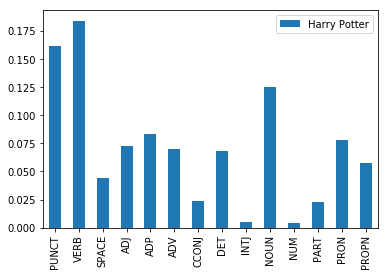

In [13]:
import pandas as pd
nlp_for_harry = spacy.load("en")

harry_potter = open("HP1.txt").read()
hp = nlp_for_harry(harry_potter)
hpSents = list(hp.sents)
hpSentenceLengths = [len(sent) for sent in hpSents]
[sent for sent in hpSents if len(sent) == max(hpSentenceLengths)]
hpPOS = pd.Series(hp.count_by(spacy.attrs.POS))/len(hp)
 
tagDict = {w.pos: w.pos_ for w in hp}
hpPOS = pd.Series(hp.count_by(spacy.attrs.POS))/len(hp)
df = pd.DataFrame([hpPOS], index=['Harry Potter'])
df.columns = [tagDict[column] for column in df.columns]
df.T.plot(kind='bar')

# Named entity recognition (NER)

![06](img/06.png)

In [15]:
#doc = nlp('Microsoft possui escritórios em toda a Europa.')
#doc = nlp('A Mercedes é uma grande empresa.')
doc = nlp('A Maria Mercedes comprou trabalhou na Mercedes Benz.')

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Maria Mercedes 2 16 PER
Mercedes Benz 38 51 ORG
